In [20]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import numpy as np


In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [10]:

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 32, shuffle=True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 32, shuffle=False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [11]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        #First conv layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        #Second conv layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        #Fully connected layers
        self.fc1 = nn.Linear(32*8*8,128)
        self.fc2 = nn.Linear(128,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,32*8*8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleCNN()


## Loss Function and Optimizer

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

## Creating and Saving Model Checkpoint

In [17]:
# Create directory for saving checkpoints
checkpoint_dir = "./checkpoints"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


# Function to save the final checkpoint
def save_final_checkpoint(epoch, model, optimizer, loss):
    checkpoint_path = f"{checkpoint_dir}/final_cnn_checkpoint.pth"
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)
    print(f"Final checkpoint saved: {checkpoint_path}")

## Training Script

In [18]:
# Training loop
for epoch in range(10):  # Train for 10 epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:  # Print every 100 batches
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0


# Save checkpoint after training ends
save_final_checkpoint(epoch, net, optimizer, loss.item())

[Epoch 1, Batch 100] loss: 0.296
[Epoch 1, Batch 200] loss: 0.297
[Epoch 1, Batch 300] loss: 0.301
[Epoch 1, Batch 400] loss: 0.291
[Epoch 1, Batch 500] loss: 0.316
[Epoch 1, Batch 600] loss: 0.321
[Epoch 1, Batch 700] loss: 0.321
[Epoch 1, Batch 800] loss: 0.323
[Epoch 1, Batch 900] loss: 0.337
[Epoch 1, Batch 1000] loss: 0.367
[Epoch 1, Batch 1100] loss: 0.340
[Epoch 1, Batch 1200] loss: 0.344
[Epoch 1, Batch 1300] loss: 0.386
[Epoch 1, Batch 1400] loss: 0.388
[Epoch 1, Batch 1500] loss: 0.361
[Epoch 2, Batch 100] loss: 0.235
[Epoch 2, Batch 200] loss: 0.234
[Epoch 2, Batch 300] loss: 0.245
[Epoch 2, Batch 400] loss: 0.243
[Epoch 2, Batch 500] loss: 0.260
[Epoch 2, Batch 600] loss: 0.283
[Epoch 2, Batch 700] loss: 0.280
[Epoch 2, Batch 800] loss: 0.305
[Epoch 2, Batch 900] loss: 0.299
[Epoch 2, Batch 1000] loss: 0.291
[Epoch 2, Batch 1100] loss: 0.288
[Epoch 2, Batch 1200] loss: 0.315
[Epoch 2, Batch 1300] loss: 0.301
[Epoch 2, Batch 1400] loss: 0.290
[Epoch 2, Batch 1500] loss: 0.32

## Loading the Checkpoint to train again

In [26]:
# Function to load checkpoint
def load_checkpoint(model, optimizer, filename='final_cnn_checkpoint.pth'):
    checkpoint = torch.load(f"{checkpoint_dir}/{filename}")
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Checkpoint loaded: epoch {epoch}, loss: {loss}")
    return epoch, loss

# Load model, optimizer, and resume from checkpoint
net = SimpleCNN()  # Recreate the model instance
optimizer = optim.Adam(net.parameters(), lr=0.0001)  # Recreate the optimizer

# Load checkpoint
start_epoch, loss = load_checkpoint(net, optimizer)

# Continue training from loaded epoch
for epoch in range(start_epoch + 1, start_epoch + 11):  # Continue for 10 more epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0


save_final_checkpoint(epoch, net, optimizer, loss.item())
print("Resumed Training Complete")


Checkpoint loaded: epoch 19, loss: 0.0031370935030281544
[Epoch 21, Batch 100] loss: 0.062
[Epoch 21, Batch 200] loss: 0.053
[Epoch 21, Batch 300] loss: 0.055
[Epoch 21, Batch 400] loss: 0.059
[Epoch 21, Batch 500] loss: 0.064
[Epoch 21, Batch 600] loss: 0.044
[Epoch 21, Batch 700] loss: 0.080
[Epoch 21, Batch 800] loss: 0.063
[Epoch 21, Batch 900] loss: 0.081
[Epoch 21, Batch 1000] loss: 0.109
[Epoch 21, Batch 1100] loss: 0.098
[Epoch 21, Batch 1200] loss: 0.092
[Epoch 21, Batch 1300] loss: 0.092
[Epoch 21, Batch 1400] loss: 0.068
[Epoch 21, Batch 1500] loss: 0.073
[Epoch 22, Batch 100] loss: 0.048
[Epoch 22, Batch 200] loss: 0.057
[Epoch 22, Batch 300] loss: 0.065
[Epoch 22, Batch 400] loss: 0.079
[Epoch 22, Batch 500] loss: 0.065
[Epoch 22, Batch 600] loss: 0.070
[Epoch 22, Batch 700] loss: 0.068
[Epoch 22, Batch 800] loss: 0.086
[Epoch 22, Batch 900] loss: 0.067
[Epoch 22, Batch 1000] loss: 0.088
[Epoch 22, Batch 1100] loss: 0.116
[Epoch 22, Batch 1200] loss: 0.100
[Epoch 22, Batch

Checkpoint loaded for testing from epoch 29
True label: cat, Predicted: dog


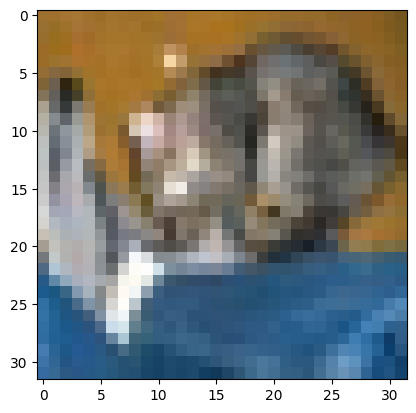

True label: ship, Predicted: plane


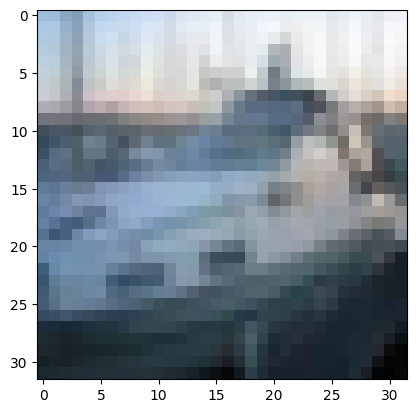

True label: frog, Predicted: bird


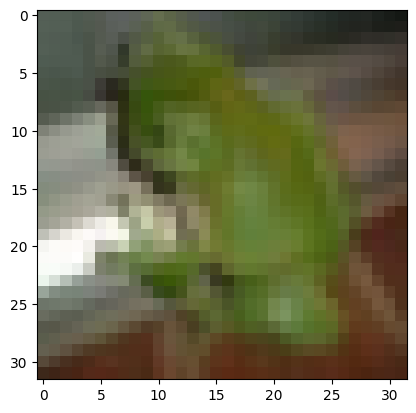

True label: dog, Predicted: bird


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000001F972B0C720>
Traceback (most recent call last):
  File "D:\python_card_reader\ocr2\Lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "D:\python_card_reader\ocr2\Lib\site-packages\torch\utils\data\dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000001F972B0C720>
Traceback (most recent call last):
  File "D:\python_card_reader\ocr2\Lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "D:\python_card_reader\ocr2\Lib\site-packages\torch\utils\data\dataloader.py", line 1437, in _shutdown_workers
    if self._pers

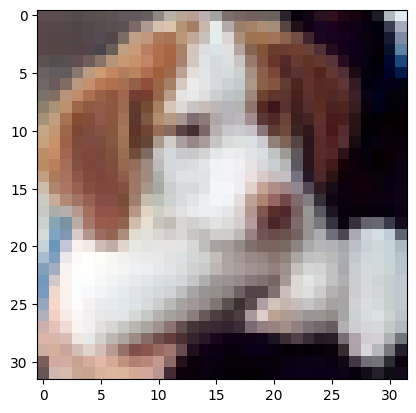

True label: horse, Predicted: dog


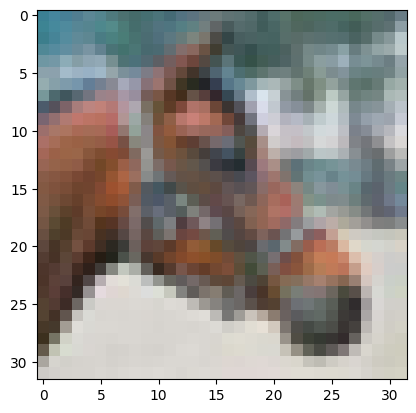

In [29]:
# Function to load checkpoint
def load_checkpoint_for_testing(model, filename='final_cnn_checkpoint.pth'):
    checkpoint = torch.load(f"{checkpoint_dir}/{filename}")
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Checkpoint loaded for testing from epoch {checkpoint['epoch']}")

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load the trained model
net = SimpleCNN()  # Initialize the same model structure
load_checkpoint_for_testing(net)

# Disable gradient calculation for testing
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

net.eval()  # Set the model to evaluation mode

# Test the model and collect misclassified images
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        # Collect misclassified images
        for i in range(len(labels)):
            if predicted[i] != labels[i]:  # If the prediction is incorrect
                misclassified_images.append(images[i])
                misclassified_labels.append(labels[i])
                misclassified_preds.append(predicted[i])

# Visualize the first 5 misclassified images
for i in range(min(5, len(misclassified_images))):  # Show up to 5 misclassified images
    print(f"True label: {classes[misclassified_labels[i]]}, Predicted: {classes[misclassified_preds[i]]}")
    imshow(misclassified_images[i])